In [120]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

mpl.style.use('ggplot')

# Load Data

In [111]:
from sklearn.decomposition import PCA

data = pd.read_csv('../fulldata/allflares1h.csv')

def create_train_test_data(data, ts = 0.25, seed_no = 0):
    X = data.iloc[1250:,:21].to_numpy()
    y = data.iloc[1250:,21].to_numpy().astype('float')
    y = np.log10(np.exp(y))
    
    # split train and test set according to test size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=seed_no)
    
    # standardize each column of train and test separately
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    # create pca projection
    Xpca_train = PCA(n_components=3).fit_transform(X_train)
    Xpca_test = PCA(n_components=3).fit_transform(X_test)
    
    return X_train, y_train, X_test, y_test, Xpca_train, Xpca_test 

X, y, X_test, y_test, Xpca_train, Xpca_test = create_train_test_data(data, ts = 0.25)

# Data Visualization

## y against X

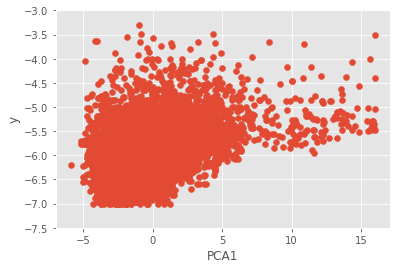

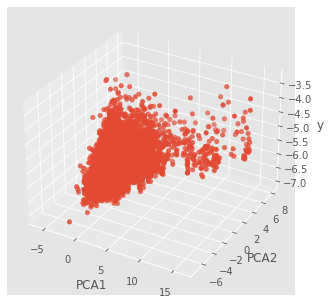

In [181]:
plt.scatter(Xpca_train[:,0], y)
plt.ylim((-7.5, -3.0))
plt.xlabel('PCA1')
plt.ylabel('y')
plt.show()


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Xpca_train[:,0], Xpca_train[:,1], y)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('y')
plt.show()

## X

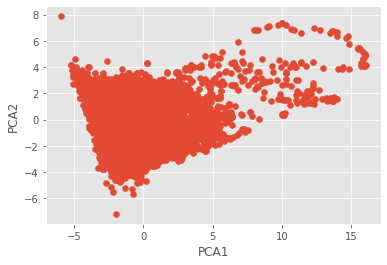

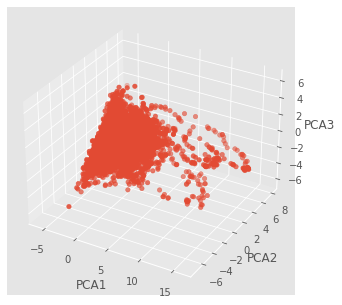

In [182]:
plt.scatter(Xpca_train[:,0], Xpca_train[:,1])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Xpca_train[:,0], Xpca_train[:,1], Xpca_train[:,2])
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.show()

# Inspect Joint distribution (X,y) Mixture Structure

In [124]:
# build train set
Xy_train = np.zeros((X.shape[0], X.shape[1]))
Xy_train[:, :X.shape[0]] = X
Xy_train[:,-1] = y

# build test set
Xy_test = np.zeros((X_test.shape[0], X_test.shape[1]))
Xy_test[:, :X.shape[0]] = X_test
Xy_test[:,-1] = y_test

# K-Means

## K = 2

Score of kmean on test set: -113961.90309996993


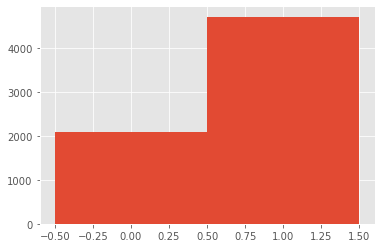

In [198]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(Xy_train)
y_kmeans = kmeans.predict(Xy_train)
print("Score of kmean on test set: {}".format(kmeans.score(X_test)))

d = np.diff(np.unique(y_kmeans)).min()
left_of_first_bin = y_kmeans.min() - float(d)/2
right_of_last_bin = y_kmeans.max() + float(d)/2
plt.hist(y_kmeans, np.arange(left_of_first_bin, right_of_last_bin + d, d))
plt.show()

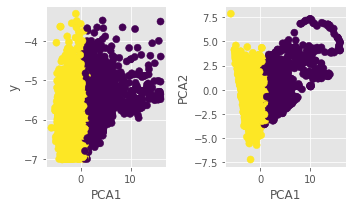

In [199]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))

ax[0].scatter(Xpca_train[:, 0], y , c=y_kmeans, s=50, cmap='viridis')
ax[0].set_xlabel('PCA1')
ax[0].set_ylabel('y')

ax[1].scatter(Xpca_train[:, 0], Xpca_train[:, 1], c=y_kmeans, s=50, cmap='viridis')
ax[1].set_xlabel('PCA1')
ax[1].set_ylabel('PCA2')

fig.tight_layout()

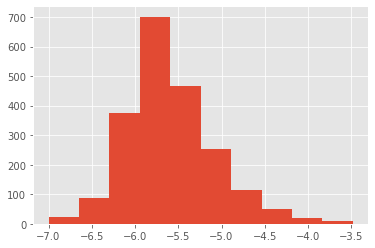

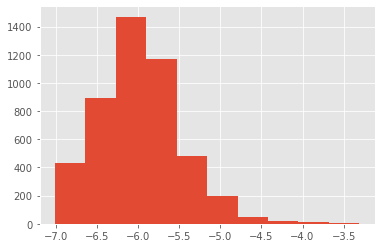

In [209]:
plt.hist(y[y_kmeans == 0])
plt.show()
plt.hist(y[y_kmeans == 1])
plt.show()

## K = 5

Score of kmean on test set: -23315.587688895033


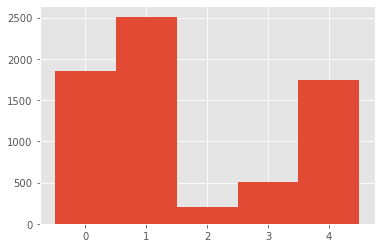

In [211]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(Xy_train)
y_kmeans = kmeans.predict(Xy_train)
print("Score of kmean on test set: {}".format(kmeans.score(Xy_test)))

d = np.diff(np.unique(y_kmeans)).min()
left_of_first_bin = y_kmeans.min() - float(d)/2
right_of_last_bin = y_kmeans.max() + float(d)/2
plt.hist(y_kmeans, np.arange(left_of_first_bin, right_of_last_bin + d, d))
plt.show()

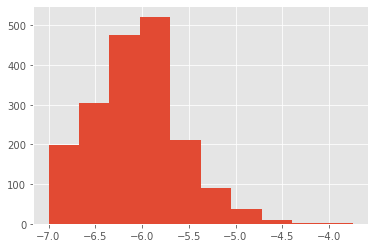

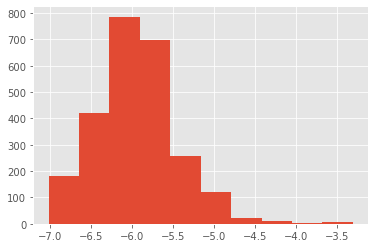

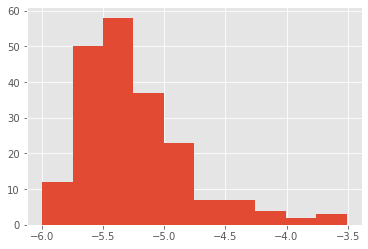

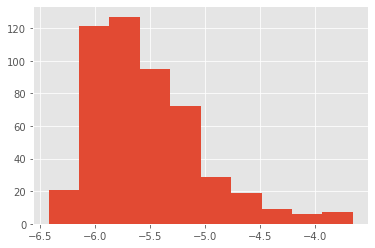

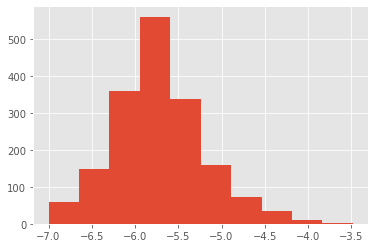

In [212]:
plt.hist(y[y_kmeans == 0])
plt.show()
plt.hist(y[y_kmeans == 1])
plt.show()
plt.hist(y[y_kmeans == 2])
plt.show()
plt.hist(y[y_kmeans == 3])
plt.show()
plt.hist(y[y_kmeans == 4])
plt.show()

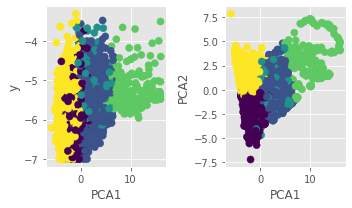

In [118]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))

ax[0].scatter(Xpca_train[:, 0], y , c=y_kmeans, s=50, cmap='viridis')
ax[0].set_xlabel('PCA1')
ax[0].set_ylabel('y')

ax[1].scatter(Xpca_train[:, 0], Xpca_train[:, 1], c=y_kmeans, s=50, cmap='viridis')
ax[1].set_xlabel('PCA1')
ax[1].set_ylabel('PCA2')

fig.tight_layout()

# GMM

## K = 2

In [121]:
gmm2 = GaussianMixture(n_components=2).fit(Xy_train)

In [123]:
print("AIC score on train set is {}".format(gmm2.aic(Xy_train)))
print("BIC score on train set is {}".format(gmm2.bic(Xy_train)))
print("Test set log likelihood is {}".format(gmm2.score(Xy_test)))

AIC score on train set is 36921.077535164055
BIC score on train set is 40369.09702582969
Test set log likelihood is -2.4815052427373536


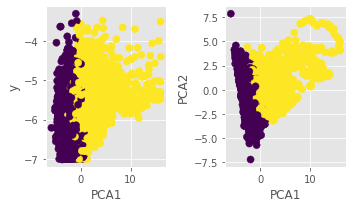

In [125]:
z = gmm2.predict(Xy_train)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))

ax[0].scatter(Xpca_train[:, 0], y , c=z, s=50, cmap='viridis')
ax[0].set_xlabel('PCA1')
ax[0].set_ylabel('y')

ax[1].scatter(Xpca_train[:, 0], Xpca_train[:, 1], c=z, s=50, cmap='viridis')
ax[1].set_xlabel('PCA1')
ax[1].set_ylabel('PCA2')

fig.tight_layout()

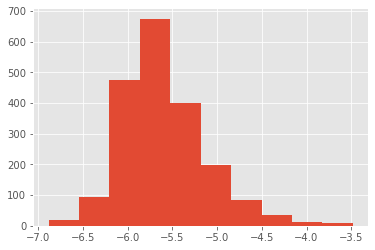

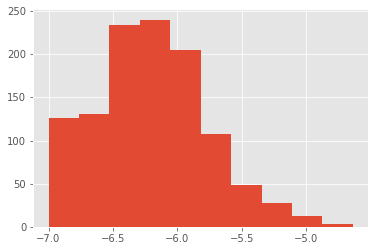

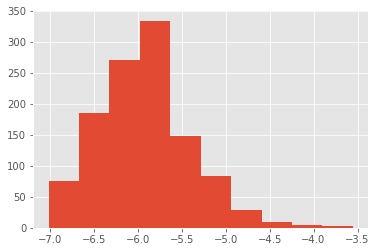

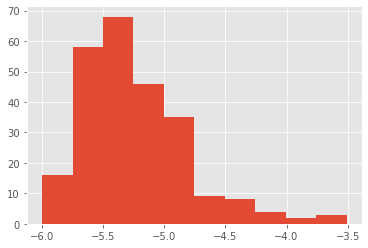

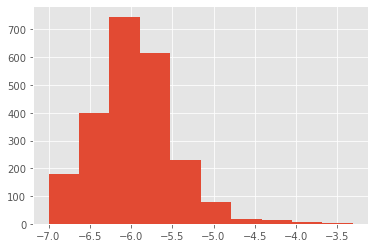

In [213]:
plt.hist(y[z == 0])
plt.show()
plt.hist(y[z == 1])
plt.show()
plt.hist(y[z == 2])
plt.show()
plt.hist(y[z == 3])
plt.show()
plt.hist(y[z == 4])
plt.show()

## K = 5

In [217]:
gmm5 = GaussianMixture(n_components=5).fit(Xy_train)

In [218]:
print("AIC score on train set is {}".format(gmm5.aic(Xy_train)))
print("BIC score on train set is {}".format(gmm5.bic(Xy_train)))
print("Test set log likelihood is {}".format(gmm5.score(Xy_test)))

AIC score on train set is -22052.587428691564
BIC score on train set is -13422.297059976
Test set log likelihood is 1.750609454251724


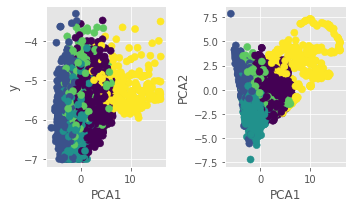

In [219]:
z = gmm5.predict(Xy_train)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))

ax[0].scatter(Xpca_train[:, 0], y , c=z, s=50, cmap='viridis')
ax[0].set_xlabel('PCA1')
ax[0].set_ylabel('y')

ax[1].scatter(Xpca_train[:, 0], Xpca_train[:, 1], c=z, s=50, cmap='viridis')
ax[1].set_xlabel('PCA1')
ax[1].set_ylabel('PCA2')

fig.tight_layout()

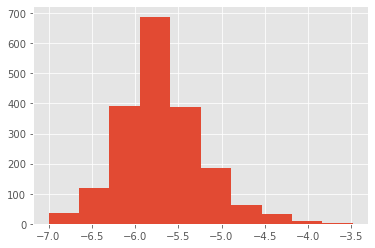

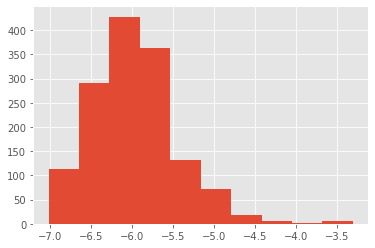

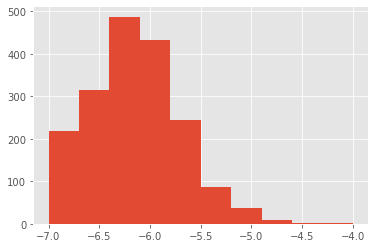

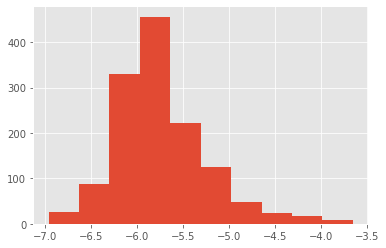

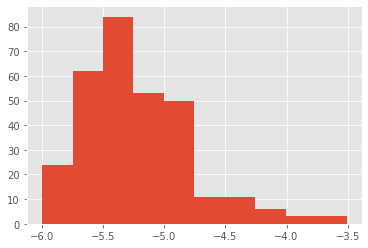

In [220]:
plt.hist(y[z == 0])
plt.show()
plt.hist(y[z == 1])
plt.show()
plt.hist(y[z == 2])
plt.show()
plt.hist(y[z == 3])
plt.show()
plt.hist(y[z == 4])
plt.show()

# Linear Coefficient Clustering Structure

# Fit beta_i for Y_i = beta_i X_i + eps_i

In [226]:
X_design = np.ones((X.shape[0], X.shape[1] + 1))
X_design[:,1:] = X

betas = np.zeros((X.shape[0], X.shape[1] + 1))

for n in range(X.shape[0]):
    betas[n, ] = inv(np.outer(X_design[n,], X_design[n,])).dot(X_design[n,]).dot(y[n])

In [227]:
pca = PCA(n_components=3)
betas_pca = pca.fit_transform(betas)

## Visualize beta_i

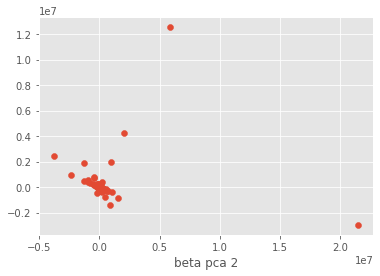

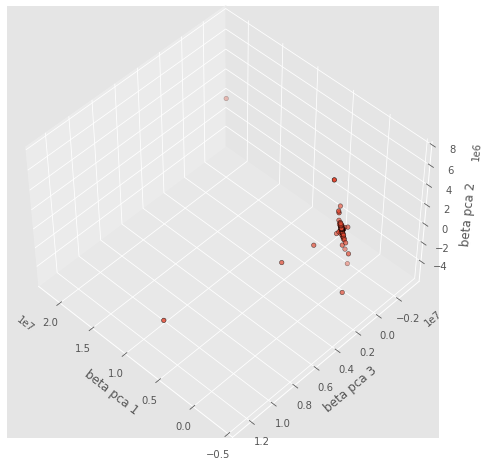

In [228]:
from mpl_toolkits.mplot3d import Axes3D

plt.scatter(betas_pca[:,0], betas_pca[:,1])
plt.xlabel('beta pca 1')
plt.xlabel('beta pca 2')
plt.show()


fig = plt.figure(1, figsize=(10, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
ax.scatter(betas_pca[:, 0], betas_pca[:, 1], betas_pca[:, 2], 
           cmap=plt.cm.nipy_spectral,
           edgecolor='k')
ax.set_xlabel('beta pca 1')
ax.set_zlabel('beta pca 2')
ax.set_ylabel('beta pca 3')
plt.show()

## Quantitative Description of beta

In [229]:
pd.DataFrame(betas).describe()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
count,6.821000e+03,6.821000e+03,6.821000e+03,6.821000e+03,6.821000e+03,6.821000e+03,6.821000e+03,6.821000e+03,6.821000e+03,6.821000e+03,...,6.821000e+03,6.821000e+03,6.821000e+03,6.821000e+03,6.821000e+03,6821.000000,6.821000e+03,6.821000e+03,6.821000e+03,6.821000e+03
mean,1.169547e+01,-1.802036e+03,-9.453764e+02,-5.099819e+02,7.336742e+02,-1.062067e+03,-7.398418e+02,-3.748359e+02,6.285631e+01,8.232312e+02,...,-1.582591e+03,-1.160162e+02,-1.069055e+03,4.187183e+02,7.794645e+01,52.478802,-2.518964e+02,-2.767817e+02,1.458343e+02,1.048097e+00
std,1.916711e+04,9.341595e+04,6.042752e+04,3.326032e+04,7.779701e+04,6.027289e+04,5.411595e+04,1.327729e+05,1.562734e+05,8.592748e+04,...,1.002562e+05,3.124048e+04,8.169303e+04,8.470989e+04,7.828823e+04,9261.759627,3.685658e+04,2.200435e+04,4.018951e+04,1.430333e+05
min,-1.317703e+06,-5.701632e+06,-3.145728e+06,-1.606982e+06,-7.293842e+05,-4.718592e+06,-4.325376e+06,-6.494691e+06,-9.071256e+06,-3.140833e+06,...,-7.864320e+06,-1.481130e+06,-5.822577e+06,-1.601151e+06,-4.199213e+06,-249074.561336,-2.359296e+06,-1.591366e+06,-2.145360e+06,-5.584100e+06
25%,-1.707135e+02,-1.428867e+02,-1.846256e+02,-1.863651e+02,-1.906754e+02,-1.798332e+02,-1.761880e+02,-1.639084e+02,-1.300852e+02,-1.348749e+02,...,-1.424743e+02,-8.065496e+01,-7.336043e+01,-9.621165e+01,-9.473310e+01,-53.957820,-4.708845e+01,-4.468021e+01,-3.461731e+01,-4.708845e+01
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.921397e+02,1.481742e+02,1.975656e+02,1.713468e+02,1.659814e+02,1.614642e+02,1.614642e+02,1.816890e+02,1.458173e+02,1.357819e+02,...,1.287852e+02,8.029454e+01,7.120661e+01,1.038519e+02,9.231282e+01,52.183030,4.708845e+01,4.468021e+01,3.512368e+01,4.566015e+01
max,4.423680e+05,8.124182e+05,1.246828e+06,1.179648e+06,6.291456e+06,3.981784e+05,4.776333e+05,8.257536e+06,7.864320e+06,5.505024e+06,...,1.572864e+06,1.966080e+06,2.741580e+06,6.645080e+06,4.718592e+06,474798.491021,1.164080e+06,5.898240e+05,1.608693e+06,7.809021e+06


In [230]:
pd.DataFrame(betas_pca).describe()

,0,1,2
count,6.821000e+03,6.821000e+03,6.821000e+03
mean,8.192253e-13,-5.529770e-12,-4.642276e-12
std,2.807407e+05,1.737332e+05,1.358085e+05
min,-3.782755e+06,-2.964371e+06,-5.269388e+06
25%,-4.094571e+03,-3.168506e+03,1.361602e+02
50%,-3.653913e+03,-2.879753e+03,2.807014e+02
75%,-3.195368e+03,-2.610186e+03,4.283719e+02
max,2.150375e+07,1.254226e+07,7.376284e+06


## Standard Clustering Algo on beta

## K-Mean

In [231]:
# K = 2
kmeans = KMeans(n_clusters=2)
kmeans.fit(betas)
z_betas = kmeans.predict(betas)

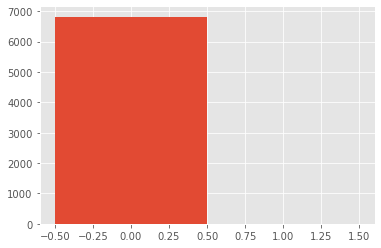

In [232]:
d = np.diff(np.unique(z_betas)).min()
left_of_first_bin = z_betas.min() - float(d)/2
right_of_last_bin = z_betas.max() + float(d)/2
plt.hist(z_betas, np.arange(left_of_first_bin, right_of_last_bin + d, d))
plt.show()

In [233]:
# K = 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(betas)
z_betas = kmeans.predict(betas)

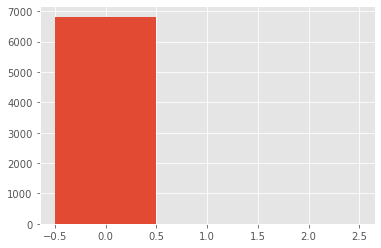

In [234]:
d = np.diff(np.unique(z_betas)).min()
left_of_first_bin = z_betas.min() - float(d)/2
right_of_last_bin = z_betas.max() + float(d)/2
plt.hist(z_betas, np.arange(left_of_first_bin, right_of_last_bin + d, d))
plt.show()

## GMM

In [235]:
# K = 2
gmm2 = GaussianMixture(n_components=2).fit(betas)

z_betas = gmm2.predict(betas)

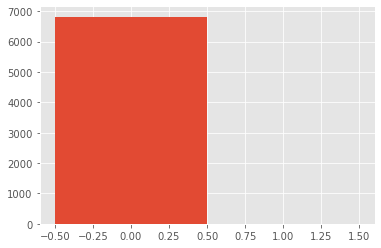

In [236]:
d = np.diff(np.unique(z_betas)).min()
left_of_first_bin = z_betas.min() - float(d)/2
right_of_last_bin = z_betas.max() + float(d)/2
plt.hist(z_betas, np.arange(left_of_first_bin, right_of_last_bin + d, d))
plt.show()

In [237]:
# K = 3
gmm3 = GaussianMixture(n_components=3).fit(betas)

z_betas = gmm3.predict(betas)

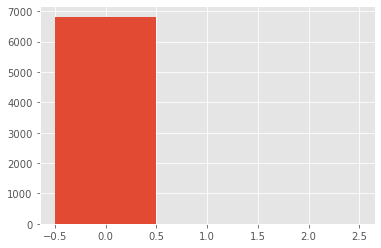

In [238]:
d = np.diff(np.unique(z_betas)).min()
left_of_first_bin = z_betas.min() - float(d)/2
right_of_last_bin = z_betas.max() + float(d)/2
plt.hist(z_betas, np.arange(left_of_first_bin, right_of_last_bin + d, d))
plt.show()

# Analyse beta for weak and strong category flares

In [240]:
from scipy import stats

index = y > -5

for d in range(betas_pca.shape[1]):
    print(stats.ks_2samp(betas_pca[index,d],betas_pca[~index,d]))

Ks_2sampResult(statistic=0.023824774402809057, pvalue=0.9772698429994133)
Ks_2sampResult(statistic=0.04604823651066425, pvalue=0.3657504444611147)
Ks_2sampResult(statistic=0.028312540451268776, pvalue=0.9062556334748745)


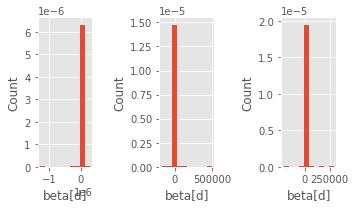

In [242]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(5, 3))

for d in range(betas_pca.shape[1]):
    axes[d].hist(betas_pca[index,d,], density=True)
    axes[d].set_xlabel("beta[d]")
    axes[d].set_ylabel("Count")

plt.tight_layout()

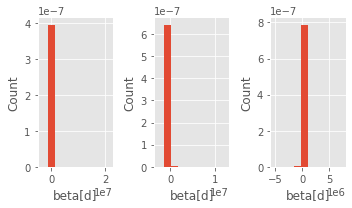

In [244]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(5, 3))

for d in range(betas_pca.shape[1]):
    axes[d].hist(betas_pca[~index,d,], density=True)
    axes[d].set_xlabel("beta[d]")
    axes[d].set_ylabel("Count")

plt.tight_layout()